In [1]:
import os
import re
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def get_concurrency_parallelism(cc_value):
    value = int(sqrt(cc_value))
    return value, value

def process_log_file(full_path):
   
    if os.stat(full_path).st_size == 0:
        print(f"Skipping empty file: {filename}")
        return 0
    with open(full_path, 'r') as file:
        data = []
        last_non_zero_throughput = None
        for line in file:
#             match = re.search(r'(\d+\.\d+).*Throughput @(\d+\.\d+)s:\s+(\d+\.\d+)Gbps, lossRate: (\d+\.\d+|\d+) CC:(\d+)\s+score:(-?\d+\.\d+)\s+rtt:(\d+\.\d+) ms energy:(\d+\.\d+) Jules s-plr:(\d+\.\d+)', line)
            match = re.search(r'(\d+\.\d+).*Throughput @(\d+\.\d+)s:\s+(\d+\.\d+)Gbps, lossRate: (\d+\.\d+|\d+) CC:(\d+)\s+score:(-?\d+\.\d+)\s+rtt:(\d+\.\d+) ms energy:(\d+\.\d+) Jules s-plr:([\deE.-]+)', line)
            if match:
                time = datetime.fromtimestamp(float(match.group(1)))
                throughput = "{:.6f}".format(float(match.group(3)))
                loss_rate = "{:.6f}".format(float(match.group(4)))
                cc = int(match.group(5))
                score = "{:.6f}".format(float(match.group(6)))
                rtt = "{:.6f}".format(float(match.group(7)))
                energy = "{:.6f}".format(float(match.group(8)))
                sender_lr = "{:.6f}".format(float(match.group(9)))

                # If you need them as floats and not strings
                throughput = float(throughput)
                loss_rate = float(loss_rate)
                score = float(score)
                rtt = float(rtt)
                energy = float(energy)
                sender_lr = float(sender_lr)
                concurrency, parallelism = get_concurrency_parallelism(cc)
                data.append([time, throughput, loss_rate, cc, score, rtt, energy, sender_lr, concurrency, parallelism])

        if data:
            df = pd.DataFrame(data, columns=['Time', 'Throughput', 'receiver_lr', 'CC', 'Score', 'RTT', 'Energy', 'sender_lr', 'concurrency', 'parallelism'])
            
        else:
            df=pd.DataFrame()
            print(f"No valid data in file: {filename}")
    
    return df


def find_transitions(df, column_name, start_value, target_value):
    # Create a new empty DataFrame with the same columns
    new_df = pd.DataFrame(columns=df.columns)
    # Flag to mark if we are currently in a transition block
    in_transition = False
    # Iterate through the DataFrame
    for index, row in df.iterrows():
        # Check for transition start
        if row[column_name] == start_value and not in_transition:
            in_transition = True
        # Check for transition end
        elif row[column_name] == target_value and in_transition:
            new_df = new_df.append(row)
        # If the value is neither start nor target, reset the flag
        elif row[column_name] != start_value:
            in_transition = False

    return new_df


In [2]:
!pwd

/home/cc/transferService/RL_agents/PPO_self_implementation


In [3]:
logFile="/home/cc/transferService/RL_agents/PPO_self_implementation/stored_log/ppo_self_norm_max_min_logFile_01_14_2024_22_18_49.log"
df=process_log_file(logFile)
print(df.describe())
# Get minimum values of each column as a NumPy array
min_values = df.min().values

# Get maximum values of each column as a NumPy array
max_values = df.max().values

print(f'min_values : {min_values[1:]}')
print(f'max_values : {max_values[1:]}')

         Throughput   receiver_lr            CC         Score           RTT  \
count  47711.000000  47711.000000  47711.000000  47711.000000  47711.000000   
mean       2.572971      0.000401     23.913269      2.297353     33.612188   
std        2.830455      0.017878     20.706399      2.666114      6.055093   
min        0.000000      0.000000      1.000000    -75.000000      0.000000   
25%        0.320000      0.000000      4.000000      0.000000     32.700000   
50%        1.600000      0.000000     16.000000      1.000000     32.800000   
75%        3.840000      0.000000     36.000000      4.000000     33.700000   
max       19.520000      2.000000     64.000000     18.000000     89.900000   

             Energy     sender_lr   concurrency   parallelism  
count  47711.000000  47711.000000  47711.000000  47711.000000  
mean      53.331936      0.001215      4.292385      4.292385  
std       25.931004      0.022263      2.342821      2.342821  
min        0.000000      0.00000

In [4]:
cluster_dictionary={}
column_name='concurrency'
start_value=1
target_value=5
value=f'{column_name}_{str(start_value)}_{str(target_value)}'
print(value)
cluster_dictionary[value]=find_transitions(df,column_name,start_value,target_value)
print(type(cluster_dictionary[value]))
print(cluster_dictionary[value].describe())
print(cluster_dictionary[value])


concurrency_1_5


/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

<class 'pandas.core.frame.DataFrame'>
        Throughput  receiver_lr        Score          RTT       Energy  \
count  1782.000000       1782.0  1782.000000  1782.000000  1782.000000   
mean      2.277351          0.0     1.987654    33.591695    45.373176   
std       2.636169          0.0     2.431051     5.598385    21.046496   
min       0.000000          0.0    -3.000000     0.000000     0.000000   
25%       0.320000          0.0     0.000000    32.700000    41.000000   
50%       0.960000          0.0     1.000000    32.800000    43.000000   
75%       3.840000          0.0     3.000000    33.575000    51.000000   
max      11.840000          0.0    11.000000    57.900000   101.000000   

         sender_lr  
count  1782.000000  
mean      0.000488  
std       0.006209  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       0.198582  
                            Time  Throughput  receiver_lr  CC  Score   RTT  \
180   2024-01-14 22:21:51.54

/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row)
/tmp/ipykernel_445935/384272794.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.ap

In [5]:
# cluster_dictionary={}
# column_name='concurrency'
# value_list=[]
# for i in range(1, 9):
#     for j in range(1, 9):
#         if i!=j:
#             start_value=i
#             target_value=j
#             value=f'{column_name}_{str(start_value)}_{str(target_value)}'
#             print(value)
#             value_list.append(value)
#             cluster_dictionary[value]=find_transitions(df,column_name,start_value,target_value)


In [6]:

def print_empty_dataframes(dfs):
    total_rows=0
    for key, df in dfs.items():
        if df.empty:
            print(f"The DataFrame for key '{key}' is empty.")
        else:
            num_rows = len(df)
            total_rows+=num_rows
            print(f"The DataFrame for key '{key}' has {num_rows} rows")
    print(f"\n\n\nThere are toatl {total_rows} rows in all the transitions dictionaries")
# print_empty_dataframes(cluster_dictionary)          

In [7]:
import pickle
# with open('dataframes.pickle', 'wb') as handle:
#     pickle.dump(cluster_dictionary, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
with open('dataframes.pickle', 'rb') as handle:
    loaded_dfs = pickle.load(handle)

print_empty_dataframes(loaded_dfs)          

The DataFrame for key 'concurrency_1_2' has 1132 rows
The DataFrame for key 'concurrency_1_3' has 859 rows
The DataFrame for key 'concurrency_1_4' has 1297 rows
The DataFrame for key 'concurrency_1_5' has 1782 rows
The DataFrame for key 'concurrency_1_6' has 992 rows
The DataFrame for key 'concurrency_1_7' has 1249 rows
The DataFrame for key 'concurrency_1_8' has 1332 rows
The DataFrame for key 'concurrency_2_1' has 1041 rows
The DataFrame for key 'concurrency_2_3' has 350 rows
The DataFrame for key 'concurrency_2_4' has 770 rows
The DataFrame for key 'concurrency_2_5' has 931 rows
The DataFrame for key 'concurrency_2_6' has 621 rows
The DataFrame for key 'concurrency_2_7' has 601 rows
The DataFrame for key 'concurrency_2_8' has 481 rows
The DataFrame for key 'concurrency_3_1' has 984 rows
The DataFrame for key 'concurrency_3_2' has 391 rows
The DataFrame for key 'concurrency_3_4' has 520 rows
The DataFrame for key 'concurrency_3_5' has 582 rows
The DataFrame for key 'concurrency_3_6' 

In [9]:
def filter_df_by_value(df_original, column_name, value):
    """
    Filters the DataFrame based on a specific value in a given column and creates an independent copy.

    :param df_original: The original DataFrame.
    :param column_name: The name of the column to filter on.
    :param value: The value to filter by in the specified column.
    :return: A new DataFrame containing rows where the column matches the value.
    """
    filtered_df = df_original[df_original[column_name] == value].copy()
    return filtered_df

initial_value_cluster_dictionary={}
column_name='concurrency'
for i in range(1, 9):  
    start_value=i
    value=f'{column_name}_{str(start_value)}'
    print(value)
    initial_value_cluster_dictionary[value]=filter_df_by_value(df,column_name,start_value)

print_empty_dataframes(initial_value_cluster_dictionary)          


concurrency_1
concurrency_2
concurrency_3
concurrency_4
concurrency_5
concurrency_6
concurrency_7
concurrency_8
The DataFrame for key 'concurrency_1' has 9427 rows
The DataFrame for key 'concurrency_2' has 4545 rows
The DataFrame for key 'concurrency_3' has 3420 rows
The DataFrame for key 'concurrency_4' has 6882 rows
The DataFrame for key 'concurrency_5' has 7976 rows
The DataFrame for key 'concurrency_6' has 4854 rows
The DataFrame for key 'concurrency_7' has 5371 rows
The DataFrame for key 'concurrency_8' has 5236 rows



There are toatl 47711 rows in all the transitions dictionaries


In [10]:
# with open('initial_dataframes.pickle', 'wb') as handle:
#     pickle.dump(initial_value_cluster_dictionary, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
with open('initial_dataframes.pickle', 'rb') as handle:
    loaded_initial_dfs = pickle.load(handle)

print_empty_dataframes(loaded_initial_dfs)          

The DataFrame for key 'concurrency_1' has 9427 rows
The DataFrame for key 'concurrency_2' has 4545 rows
The DataFrame for key 'concurrency_3' has 3420 rows
The DataFrame for key 'concurrency_4' has 6882 rows
The DataFrame for key 'concurrency_5' has 7976 rows
The DataFrame for key 'concurrency_6' has 4854 rows
The DataFrame for key 'concurrency_7' has 5371 rows
The DataFrame for key 'concurrency_8' has 5236 rows



There are toatl 47711 rows in all the transitions dictionaries


In [12]:
def sample_row_and_neighbors(df, column_name):
    """
    Samples a row based on the distribution of a specific column and returns it with its 4 neighboring rows.

    :param df: The DataFrame to sample from.
    :param column_name: The column whose distribution to use for sampling.
    :return: A DataFrame containing the sampled row and its 4 neighbors.
    """
#     print(f"length of the df {len(df)}")
    # Calculate the frequency distribution of the column
    df=df.reset_index(drop=True)
    probabilities = df[column_name].value_counts(normalize=True)
    
    # Map these probabilities back to the DataFrame's index
    probabilities = df[column_name].map(probabilities)
#     print(f"probabilities {column_name} {type(probabilities)}  ")
    # Sample one row using these probabilities
#     sampled_index = df.sample(n=1, weights=probabilities).index[0]
    # Sample one row using these probabilities
    sampled_row = df.sample(n=1, weights=probabilities)
#     print(f"sampled_row: {sampled_row}")
    sampled_index = sampled_row.index[0]
    # Ensure the sampled index is within the DataFrame's range
    if sampled_index >= len(df):
        raise ValueError("Sampled index is out of DataFrame's range.")

#     print(f"sampled_index {sampled_index}")
    # Determine the range of indices to return
    if sampled_index < 5:
        start_index = sampled_index
        end_index = min(sampled_index + 4, len(df) - 1)
    else:
        start_index = sampled_index - 4
        end_index = sampled_index
#     print(f"start_index {start_index} end_index {end_index}")
    # Select the range from start_index to end_index
    return df.iloc[start_index:end_index + 1]

In [13]:
loaded_initial_dfs['concurrency_1']

,Time,Throughput,receiver_lr,CC,Score,RTT,Energy,sender_lr,concurrency,parallelism
0,2024-01-14 22:18:51.181967,0.00,0.0,1,0.0,0.0,0.0,0.000000,1,1
70,2024-01-14 22:20:01.367835,0.00,0.0,1,0.0,0.0,0.0,0.000000,1,1
71,2024-01-14 22:20:02.365675,0.00,0.0,1,0.0,0.0,0.0,0.000000,1,1
72,2024-01-14 22:20:03.366015,0.00,0.0,1,0.0,32.7,0.0,0.000000,1,1
73,2024-01-14 22:20:04.364606,0.00,0.0,1,0.0,32.7,0.0,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...
47545,2024-01-15 11:41:04.670488,0.32,0.0,1,0.0,32.9,43.0,0.000000,1,1
47546,2024-01-15 11:41:05.669491,0.32,0.0,1,0.0,33.1,43.0,0.000000,1,1
47547,2024-01-15 11:41:06.670063,0.32,0.0,1,0.0,32.9,43.0,0.000000,1,1
47548,2024-01-15 11:41:07.672971,0.32,0.0,1,0.0,33.4,43.0,0.000000,1,1


In [14]:
print(sample_row_and_neighbors(loaded_initial_dfs['concurrency_8'],'Score'))
print(type(sample_row_and_neighbors(loaded_initial_dfs['concurrency_8'],'Score')))


                           Time  Throughput  receiver_lr  CC  Score   RTT  \
4817 2024-01-15 10:48:40.667377        0.32          0.0  64    0.0  35.2   
4818 2024-01-15 10:48:41.667754        0.32          0.0  64    0.0  47.1   
4819 2024-01-15 10:48:42.672442        0.32          0.0  64    0.0  41.1   
4820 2024-01-15 10:48:43.661994        0.32          0.0  64    0.0  46.0   
4821 2024-01-15 10:48:44.700106        1.28          0.0  64    1.0  38.4   

      Energy  sender_lr  concurrency  parallelism  
4817     0.0        0.0            8            8  
4818     0.0        0.0            8            8  
4819    41.0        0.0            8            8  
4820    41.0        0.0            8            8  
4821    41.0        0.0            8            8  
<class 'pandas.core.frame.DataFrame'>


In [15]:
loaded_initial_dfs['concurrency_1']

,Time,Throughput,receiver_lr,CC,Score,RTT,Energy,sender_lr,concurrency,parallelism
0,2024-01-14 22:18:51.181967,0.00,0.0,1,0.0,0.0,0.0,0.000000,1,1
70,2024-01-14 22:20:01.367835,0.00,0.0,1,0.0,0.0,0.0,0.000000,1,1
71,2024-01-14 22:20:02.365675,0.00,0.0,1,0.0,0.0,0.0,0.000000,1,1
72,2024-01-14 22:20:03.366015,0.00,0.0,1,0.0,32.7,0.0,0.000000,1,1
73,2024-01-14 22:20:04.364606,0.00,0.0,1,0.0,32.7,0.0,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...
47545,2024-01-15 11:41:04.670488,0.32,0.0,1,0.0,32.9,43.0,0.000000,1,1
47546,2024-01-15 11:41:05.669491,0.32,0.0,1,0.0,33.1,43.0,0.000000,1,1
47547,2024-01-15 11:41:06.670063,0.32,0.0,1,0.0,32.9,43.0,0.000000,1,1
47548,2024-01-15 11:41:07.672971,0.32,0.0,1,0.0,33.4,43.0,0.000000,1,1


In [16]:
def normalize_and_flatten(df, min_values, max_values):
    # Drop the specified columns
    df = df.drop(columns=['Time', 'CC'])
    score_array = df['Score'].values
#     print(df.describe())
    # Normalize each column
    normalized_df = (df - min_values) / (max_values - min_values)

    # Flatten the DataFrame to a single NumPy array
    flattened_array = normalized_df.values.flatten()

    return flattened_array,score_array

min_values=np.array([0.0, 0.0, -75.0, 0.0, 0.0, 0.0, 1, 1])
max_values = np.array([19.52, 2.0, 18.0, 89.9, 110.0, 2.0, 8, 8])
df=sample_row_and_neighbors(loaded_initial_dfs['concurrency_8'],'Score')
print(f'{df}')
print(normalize_and_flatten(df,min_values,max_values))

                           Time  Throughput  receiver_lr  CC  Score   RTT  \
1271 2024-01-15 01:29:21.678559         0.0          0.0  64    0.0   0.0   
1272 2024-01-15 01:29:22.675818         0.0          0.0  64    0.0   0.0   
1273 2024-01-15 01:29:23.674970         0.0          0.0  64    0.0  32.7   
1274 2024-01-15 01:29:24.676372         0.0          0.0  64    0.0  32.8   
1275 2024-01-15 01:29:25.678148         0.0          0.0  64    0.0  32.7   

      Energy  sender_lr  concurrency  parallelism  
1271     0.0        0.0            8            8  
1272     0.0        0.0            8            8  
1273     0.0        0.0            8            8  
1274     0.0        0.0            8            8  
1275     0.0        0.0            8            8  
(array([0.        , 0.        , 0.80645161, 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.80645161, 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.  

In [31]:
import gym
from gym import spaces
import numpy as np

class transferClass(gym.Env):
    metadata = {"render_modes": ["human"], "render_fps": 30}
    def __init__(self,transaction_dfs,initial_dfs,optimizer,total_steps=20,min_values=[0.0, 0.0, -75.0, 0.0, 0.0, 0.0, 1, 1],max_values = [19.52, 2.0, 18.0, 89.9, 110.0, 2.0, 8, 8]):
        super().__init__()
        self.action_array= [(1,1),(1,1),(2,2),(3,3),(4,4),(5,5),(6,6),(7,7),(8,8)]
        self.transaction_dfs = transaction_dfs
        self.initial_dfs= initial_dfs
        self.action_space = spaces.Discrete(9) # example action space
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(40,), dtype=np.float32) # example observation space
        self.current_observation = np.zeros(40,) # initialize current observation
        self.optimizer=optimizer
        self.old_action=None
        self.step_number=0
        self.total_steps=total_steps
        self.sampling_metric='Score'
        self.min_values=np.array(min_values)
        self.max_values=np.array(max_values)
        self.previous_reward=0
        self.reward_threshold=1
        self.obs_df=[]

    def reset(self):
        self.current_observation = np.zeros(40,) # initialize current observation
        self.old_action=None
        self.step_number=0
        self.previous_reward=0
        self.obs_df=[]
        return self.current_observation

    def step(self, action):
        
        if self.old_action==None:
            done=False
            key_name=f'concurrency_{action}'
            observation_df=sample_row_and_neighbors(self.initial_dfs[key_name],self.sampling_metric)
            self.obs_df.append(observation_df)
            observation,result_array=normalize_and_flatten(observation_df,self.min_values,self.max_values)
#             reward=np.max(result_array)
#             reward=np.min(result_array)
            reward_=np.mean(result_array)
            self.old_action=action
#             if reward_- self.previous_reward >=self.reward_threshold:
#                 reward=2
#             elif reward_- self.previous_reward <= -self.reward_threshold:
#                 reward= -1
#             else:
#                 reward=0
            reward=reward_-self.previous_reward
            self.previous_reward=reward_
        
        elif self.old_action==action:
            done=False
            key_name=f'concurrency_{action}'
            observation_df=sample_row_and_neighbors(self.initial_dfs[key_name],self.sampling_metric)
            self.obs_df.append(observation_df)
            observation,result_array=normalize_and_flatten(observation_df,self.min_values,self.max_values)
#             reward=np.max(result_array)
#             reward=np.min(result_array)
            reward_=np.mean(result_array)
            self.old_action=action
#             if reward_- self.previous_reward >=self.reward_threshold:
#                 reward=2
#             elif reward_- self.previous_reward <= -self.reward_threshold:
#                 reward= -1
#             else:
#                 reward=0
            reward=reward_-self.previous_reward
            self.previous_reward=reward_
        
        else:
            done=False
            key_name=f'concurrency_{self.old_action}_{action}'
            observation_df=sample_row_and_neighbors(self.transaction_dfs[key_name],self.sampling_metric)
            self.obs_df.append(observation_df)
            observation,result_array=normalize_and_flatten(observation_df,self.min_values,self.max_values)
#             reward=np.max(result_array)
#             reward=np.min(result_array)
            reward_=np.mean(result_array)
            self.old_action=action
#             if reward_- self.previous_reward >=self.reward_threshold:
#                 reward=2
#             elif reward_- self.previous_reward <= -self.reward_threshold:
#                 reward= -1
#             else:
#                 reward=0
            reward=reward_-self.previous_reward
            self.previous_reward=reward_
            
        self.step_number+=1
        
        if self.step_number>=self.total_steps:
            done=True
#             self.reset()
        self.current_observation=observation
        return self.current_observation, reward, done, {}

    def bayes_step(self,action):
        params = [1 if x<1 else int(np.round(x)) for x in action]
        print("Bayes Step: ",params)
        if params[0] > 8:
            params[0] = 8
        obs,score_b,done_b,__=self.step(params[0])
        print("Bayes Step Score: ", score_b)
        return np.round(score_b * (-1))

    def render(self, mode="human"):
        pass

    def close(self):
        self.reset()


In [32]:
with open('dataframes.pickle', 'rb') as handle:
    loaded_dfs = pickle.load(handle)
with open('initial_dataframes.pickle', 'rb') as handle:
    loaded_initial_dfs = pickle.load(handle)

In [34]:
env=transferClass(loaded_dfs,loaded_initial_dfs,'random')
total_scores=0
s = env.reset()
action_list=[]
reward_list=[]
done = False
while not done:
    a=env.action_space.sample()
    if a==0:
        a=1
    s_next, r, done, info = env.step(a)
    action_list.append(a)
    reward_list.append(r)
    total_scores += r
    s = s_next
# print(f"env.obs_df {env.obs_df}")
accumulator_df = pd.concat(env.obs_df)  # Add more DataFrames in the list if needed

env.close()
print(f"Total Reward: {total_scores}")
print(f"actions {action_list},   {len(action_list)}")
print(f"rewards {reward_list},  {len(reward_list)}")
print(accumulator_df)

Total Reward: 1.1102230246251565e-16
actions [1, 1, 4, 7, 1, 2, 1, 6, 5, 8, 1, 7, 4, 2, 8, 4, 6, 7, 2, 1],   20
rewards [0.0, 0.8, -0.4, -0.4, 0.0, 1.0, 0.3999999999999999, -1.2, 4.2, 0.7999999999999998, -5.2, 1.4, -1.4, 2.4, -1.4, -0.8, 3.8, -1.2000000000000002, -2.1999999999999997, -0.6],  20
                           Time  Throughput  receiver_lr CC  Score   RTT  \
6981 2024-01-15 08:21:30.229777        0.00          0.0  1    0.0   0.0   
6982 2024-01-15 08:21:31.226938        0.00          0.0  1    0.0   0.0   
6983 2024-01-15 08:21:32.226741        0.00          0.0  1    0.0  32.7   
6984 2024-01-15 08:21:33.228169        0.00          0.0  1    0.0  33.2   
6985 2024-01-15 08:21:34.229522        0.00          0.0  1    0.0  37.0   
...                         ...         ...          ... ..    ...   ...   
936  2024-01-15 10:58:28.702286        0.00          0.0  1    0.0  32.7   
937  2024-01-15 10:58:29.705068        0.00          0.0  1    0.0  32.7   
938  2024-01-15 10:5

In [20]:
import matplotlib.pyplot as plt

env=transferClass(loaded_dfs,loaded_initial_dfs,'random')
result_dictionary = {}

# Run the environment multiple times
for _ in range(10000):
    done = False
    env.reset()
    previous_action = None  # Initialize previous action
    while not done:
        action = env.action_space.sample()
        if action==0:
            action=1
        _, reward, done, _ = env.step(action)
        
        # Key for result dictionary
        key = action if previous_action is None or previous_action == action else (previous_action, action)
        
        # Append the reward to the corresponding list in the dictionary
        if key not in result_dictionary:
            result_dictionary[key] = []
        result_dictionary[key].append(reward)
        previous_action = action



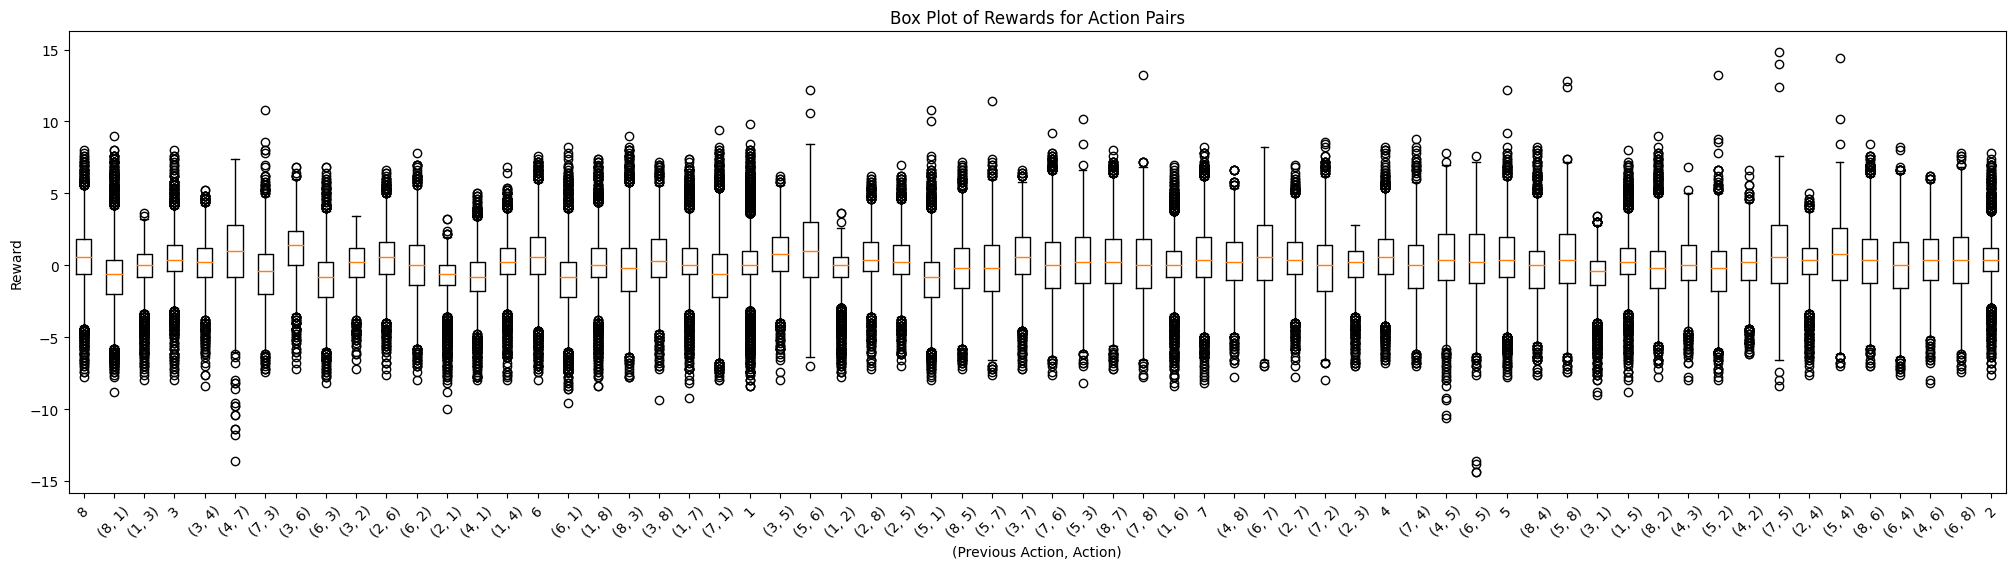

In [21]:
# Plotting
fig, ax = plt.subplots(figsize=(25, 6))
ax.boxplot(result_dictionary.values(), labels=[str(k) for k in result_dictionary.keys()])
ax.set_xlabel('(Previous Action, Action)')
ax.set_ylabel('Reward')
ax.set_title('Box Plot of Rewards for Action Pairs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

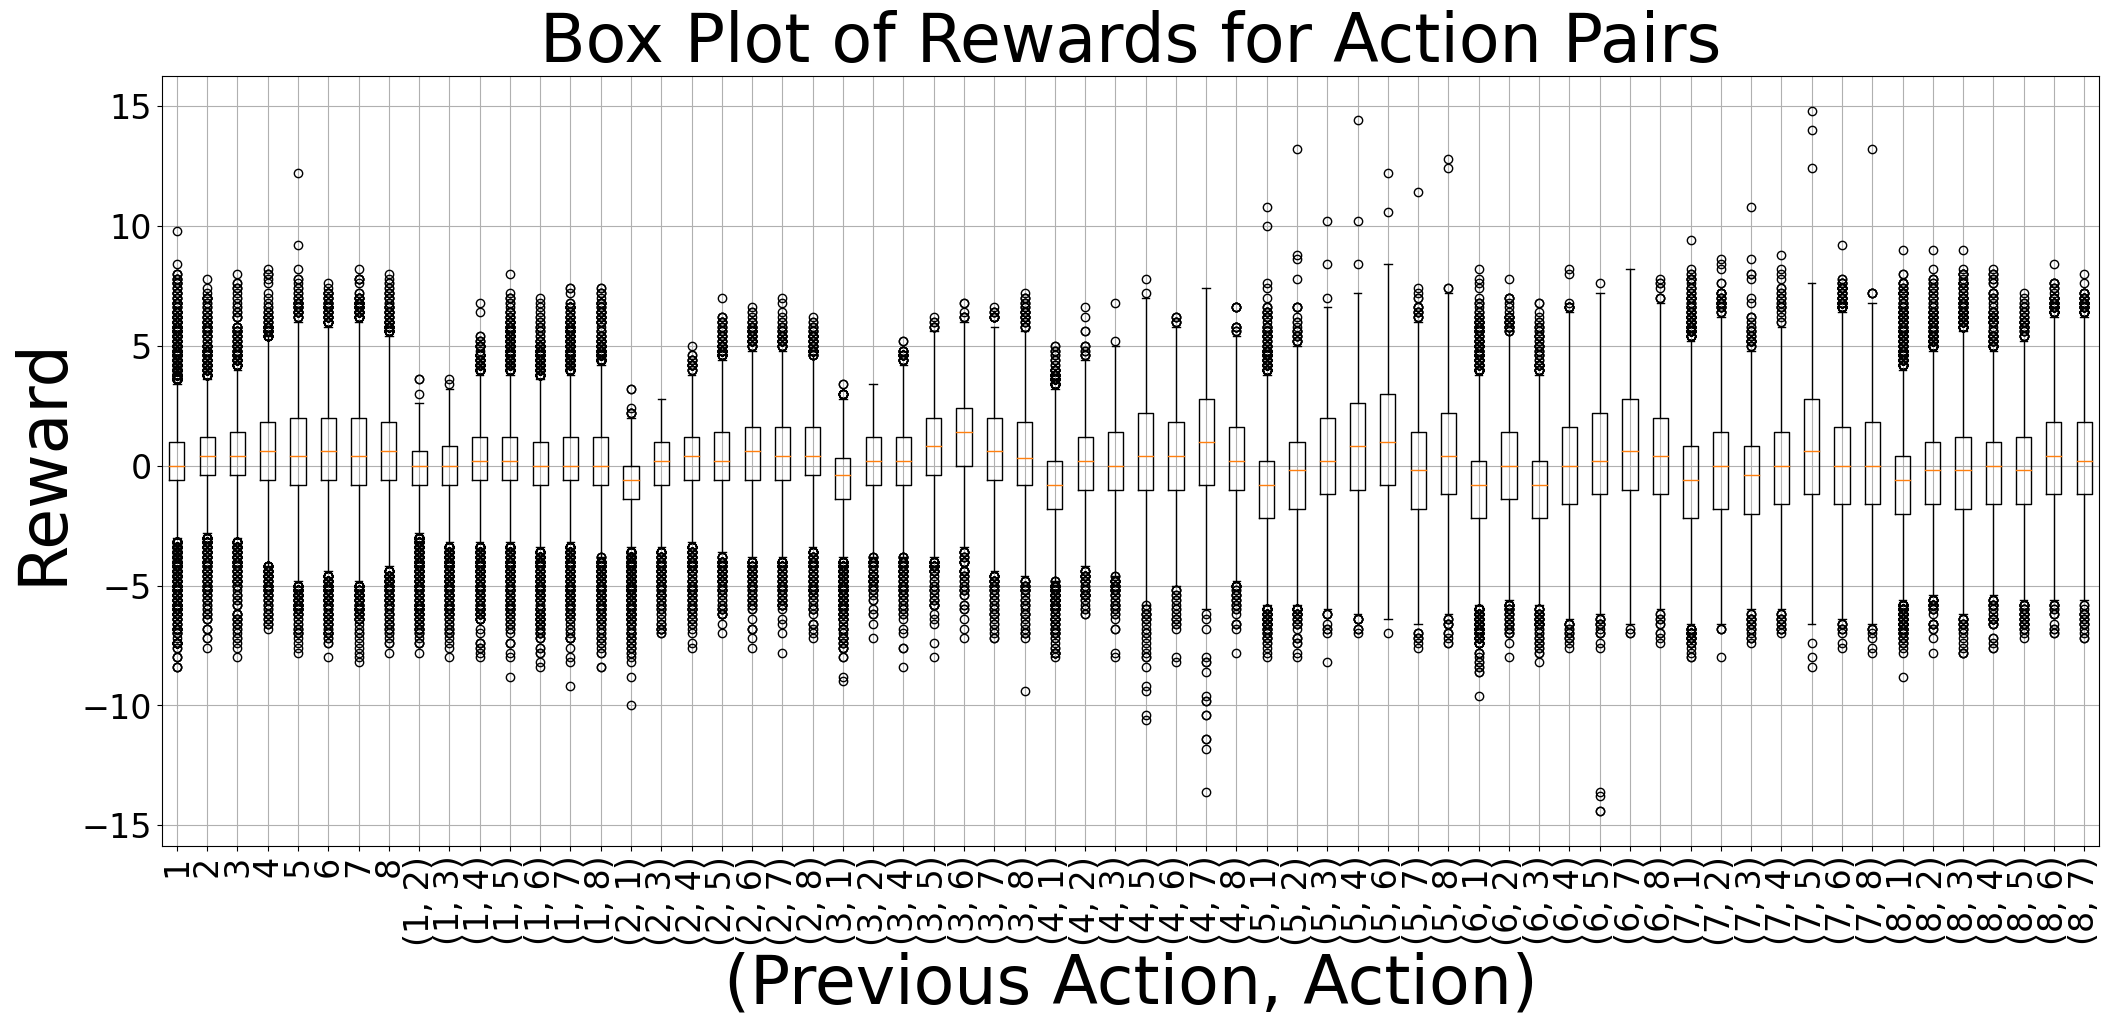

In [22]:
def custom_sort_key(item):
    # Sort single integers first, then tuples
    return (0, item) if isinstance(item, int) else (1, item)

# Sort the keys using the custom sorting function
tick_font_size = 24
label_font_size= 48
sorted_keys = sorted(result_dictionary.keys(), key=custom_sort_key)
# Plotting with a larger size
fig, ax = plt.subplots(figsize=(25, 10))
ax.boxplot([result_dictionary[key] for key in sorted_keys], labels=[str(k) for k in sorted_keys])
ax.set_xlabel('(Previous Action, Action)',fontsize=label_font_size)
ax.set_ylabel('Reward',fontsize=label_font_size)
ax.set_title('Box Plot of Rewards for Action Pairs',fontsize=label_font_size)
ax.tick_params(axis='both', which='major',labelsize=tick_font_size)
ax.grid(True)
# ax.set_ylim([-75, 10]) 
plt.xticks(rotation=90)
plt.show()

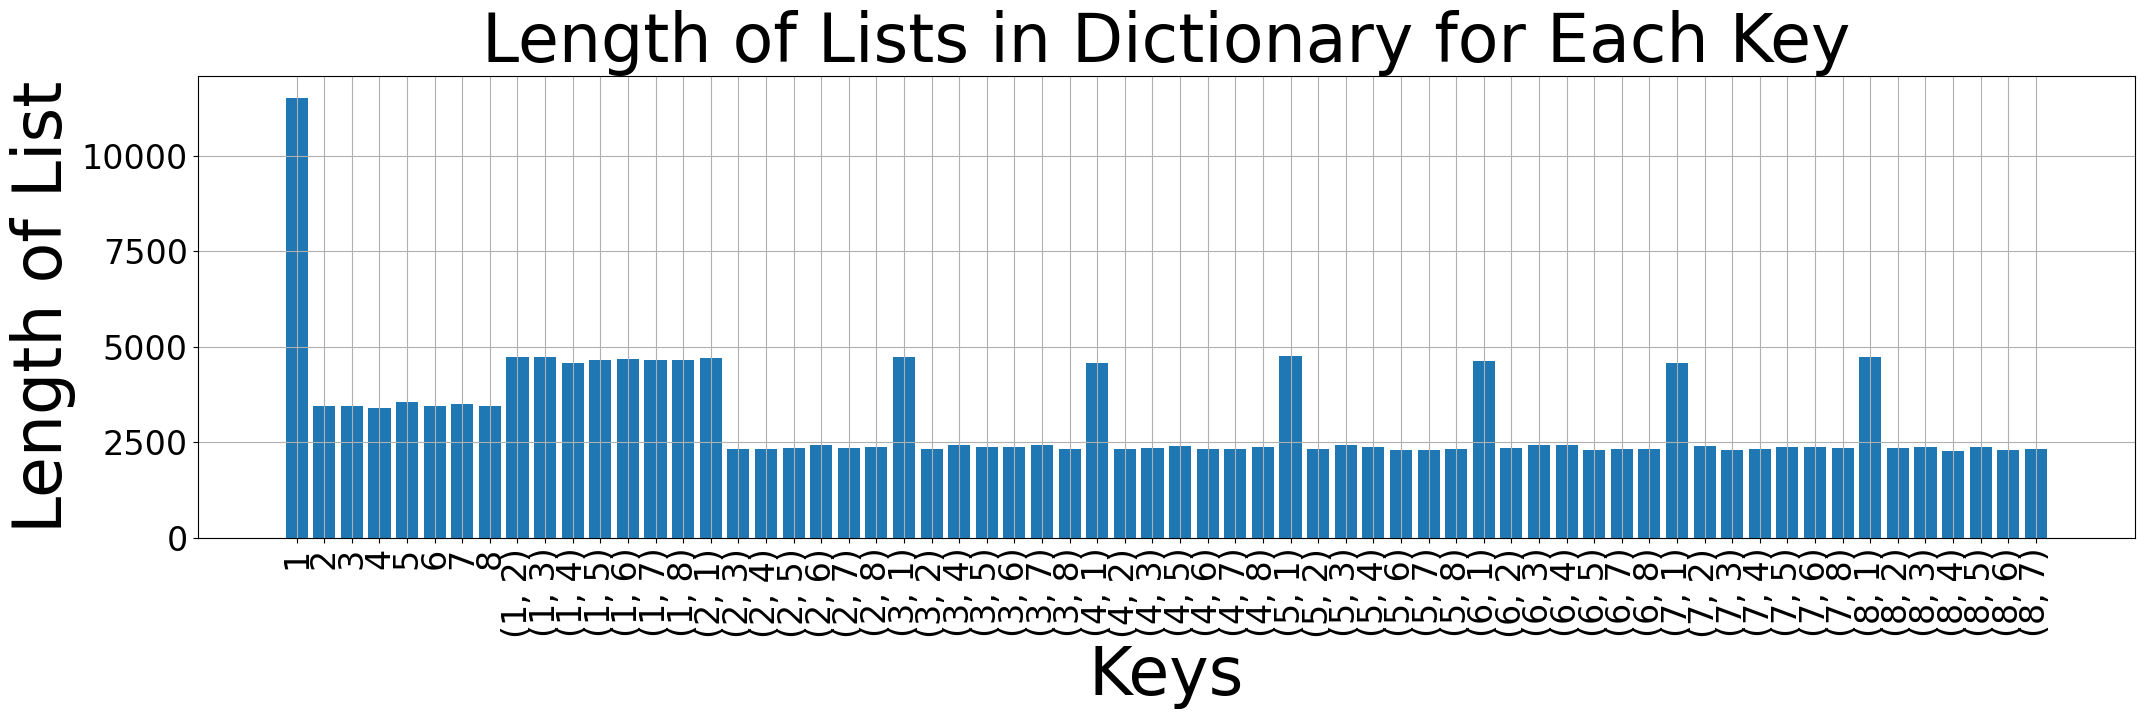

In [23]:
def custom_sort_key(item):
    return (0, item) if isinstance(item, int) else (1, item)

# Count the number of keys in the dictionary
num_keys = len(result_dictionary)

# Extract the lengths of the lists associated with each key
lengths = [len(result_dictionary[key]) for key in result_dictionary]

# Sort the keys using the custom sorting function
sorted_keys = sorted(result_dictionary.keys(), key=custom_sort_key)

# Extract the sorted lengths
sorted_lengths = [len(result_dictionary[key]) for key in sorted_keys]

# Plotting
tick_font_size = 24
label_font_size= 48
fig, ax = plt.subplots(figsize=(25, 6))
ax.bar(range(num_keys), sorted_lengths, tick_label=[str(k) for k in sorted_keys])
ax.set_xlabel('Keys',fontsize=label_font_size)
ax.set_ylabel('Length of List',fontsize=label_font_size)
ax.set_title('Length of Lists in Dictionary for Each Key',fontsize=label_font_size)
ax.tick_params(axis='both', which='major',labelsize=tick_font_size)
ax.grid(True)
plt.xticks(rotation=90)
plt.show()

                                jobUuid  jobId  concurrency  parallelism  \
0  1ebd3e2e-2b4f-4667-88a4-714eb4fc0fe7      0           13            6   
1  1ebd3e2e-2b4f-4667-88a4-714eb4fc0fe7      0           11           11   
2  1ebd3e2e-2b4f-4667-88a4-714eb4fc0fe7      0           15           13   
3  1ebd3e2e-2b4f-4667-88a4-714eb4fc0fe7      0            2            3   
4  1ebd3e2e-2b4f-4667-88a4-714eb4fc0fe7      0            8           10   
5  1ebd3e2e-2b4f-4667-88a4-714eb4fc0fe7      0           10           11   
6  8549614b-02eb-4156-bd12-56f5e075b397      1           15           16   
7  8549614b-02eb-4156-bd12-56f5e075b397      1            5            3   
8  8549614b-02eb-4156-bd12-56f5e075b397      1            3           15   

    throughput  
0  7842.219731  
1  2481.228373  
2  3538.950176  
3   821.728561  
4  5899.523605  
5   189.851961  
6  1539.268361  
7   926.874102  
8  1275.688401  
